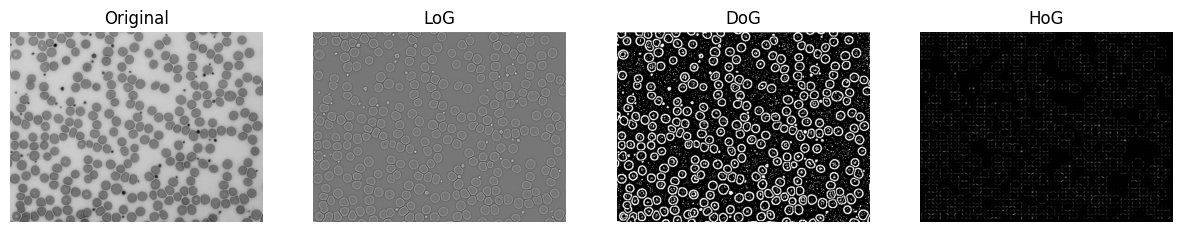

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load image
image = cv2.imread('/content/Screenshot 2025-04-04 094101.png', cv2.IMREAD_GRAYSCALE)

# LoG (Laplacian of Gaussian)
log = cv2.GaussianBlur(image, (3, 3), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

# DoG (Difference of Gaussian)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), 3)
dog = gaussian1 - gaussian2

# HoG (Histogram of Oriented Gradients)
fd, hog_image = hog(image, visualize=True)

# Plot results
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(image, cmap='gray'); ax[0].set_title('Original')
ax[1].imshow(log, cmap='gray'); ax[1].set_title('LoG')
ax[2].imshow(dog, cmap='gray'); ax[2].set_title('DoG')
ax[3].imshow(hog_image, cmap='gray'); ax[3].set_title('HoG')
for a in ax: a.axis('off')
plt.show()


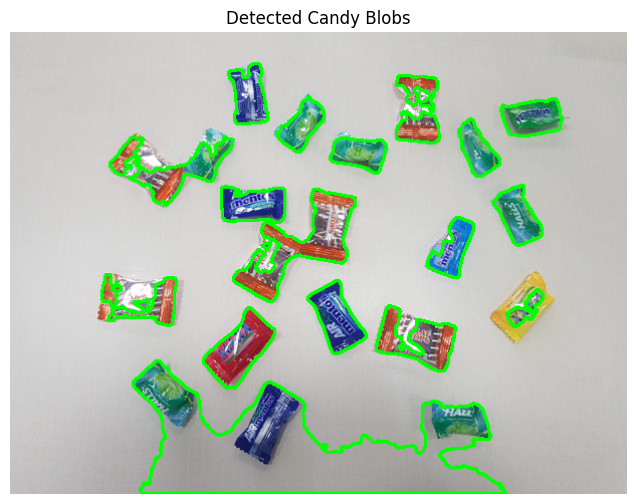

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
candies = cv2.imread('/content/canday.png')
satellite = cv2.imread('/content/Satellite images.png')

# Function to show image
def show_image(img, title="Image"):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# ------------------------------
# Blob Detection for Candies
# ------------------------------
def detect_candy_blobs(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    _, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours (blobs)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    blobbed = image.copy()
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:  # filter small noise
            cv2.drawContours(blobbed, [cnt], -1, (0, 255, 0), 2)

    show_image(blobbed, "Detected Candy Blobs")

# ------------------------------
# Blob Detection for Satellite Fields
# ------------------------------
def detect_satellite_blobs(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (11, 11), 0)
    log = cv2.Laplacian(blur, cv2.CV_64F)
    log = np.uint8(np.absolute(log))
    _, thresh = cv2.threshold(log, 40, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    blobbed = image.copy()
    for cnt in contours:
        if 200 < cv2.contourArea(cnt) < 10000:  # filter by size
            (x, y), r = cv2.minEnclosingCircle(cnt)
            cv2.circle(blobbed, (int(x), int(y)), int(r), (0, 0, 255), 2)

    show_image(blobbed, "Detected Satellite Blobs")

# Run both detections
detect_candy_blobs(candies)
detect_satellite_blobs(satellite)


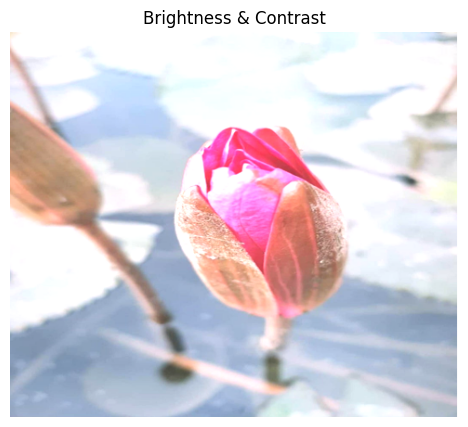

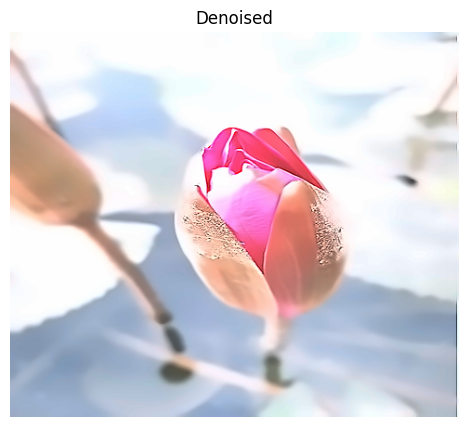

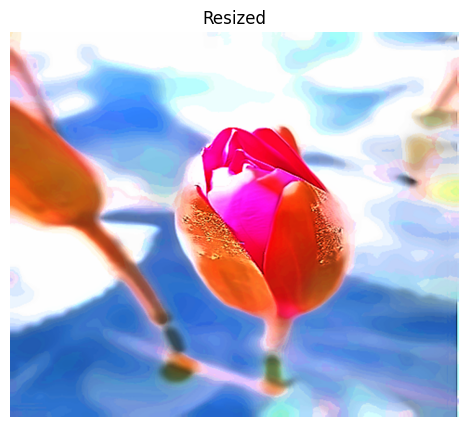

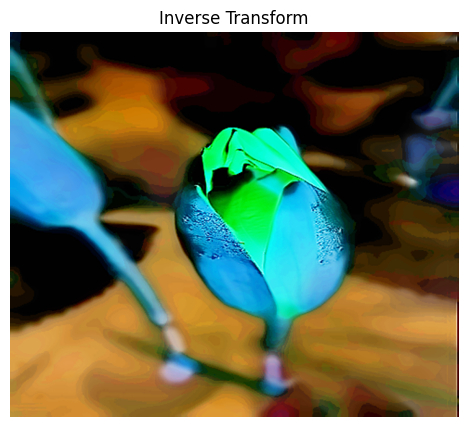

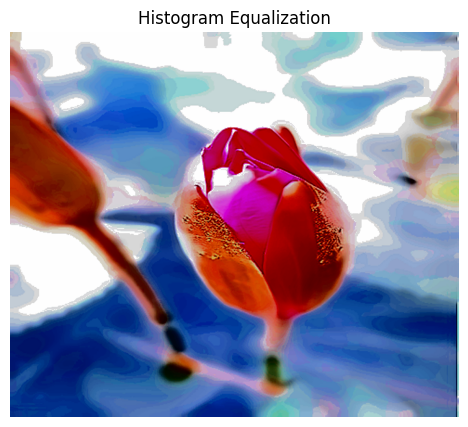

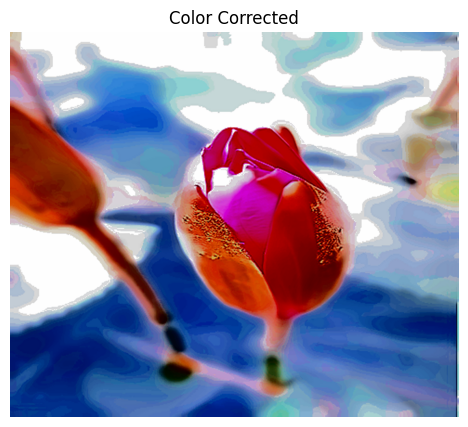

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/flowers.png")

# Function to show multiple images
def show(title, img):
    plt.figure(figsize=(6, 5))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. Brightness and Contrast Adjustment
def adjust_brightness_contrast(img, alpha=1.2, beta=30):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# 2. Sharpening
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# 3. Noise Removal (Denoising)
def remove_noise(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# 4. Enhance Color
def enhance_color(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[...,1] = cv2.equalizeHist(hsv[...,1])
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# 5. Resize and Scale
def resize_image(img, scale_percent=150):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)

# 6. Inverse Transform (Negative)
def inverse_transform(img):
    return cv2.bitwise_not(img)

# 7. Histogram Equalization
def equalize_histogram(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

# 8. Super-Resolution using upscale (simulated)
def super_resolution(img, scale=2):
    height, width = img.shape[:2]
    return cv2.resize(img, (width * scale, height * scale), interpolation=cv2.INTER_CUBIC)

# 9. Color Correction (Simple White Balance)
def color_correction(img):
    result = cv2.xphoto.createSimpleWB().balanceWhite(img)
    return result

# Apply all transformations
bright_contrast = adjust_brightness_contrast(image)
sharpened = sharpen_image(bright_contrast)
denoised = remove_noise(sharpened)
color_enhanced = enhance_color(denoised)
resized = resize_image(color_enhanced)
inverse = inverse_transform(resized)
hist_eq = equalize_histogram(resized)
super_res = super_resolution(hist_eq)

# Optional: Color Correction (needs xphoto)
try:
    color_corrected = color_correction(super_res)
except:
    color_corrected = super_res

# Display images
show("Original", image)
show("Brightness & Contrast", bright_contrast)
show("Sharpened", sharpened)
show("Denoised", denoised)
show("Color Enhanced", color_enhanced)
show("Resized", resized)
show("Inverse Transform", inverse)
show("Histogram Equalization", hist_eq)
show("Super Resolution", super_res)
show("Color Corrected", color_corrected)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time

# Load CIFAR-100
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Load Pretrained Models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)
alexnet = alexnet.to(device)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16 = vgg16.to(device)

# Training function
def train_model(model, epochs=2):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1} Loss: {running_loss/len(trainloader):.4f}")

# Evaluate model
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    start = time.time()

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    end = time.time()
    print(f'Accuracy: {100 * correct / total:.2f}%, Time: {end - start:.2f}s')

# Train and Evaluate
print("Training AlexNet:")
train_model(alexnet)
evaluate_model(alexnet)

print("Training VGG16:")
train_model(vgg16)
evaluate_model(vgg16)


100%|██████████| 169M/169M [00:03<00:00, 42.4MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 268MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'we

Training AlexNet:
Epoch 1 Loss: 2.2128


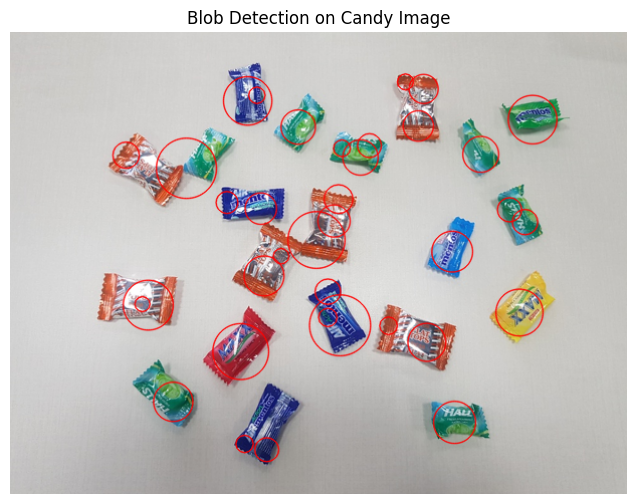

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('/content/canday.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 150

# Filter by Circularity
params.filterByCircularity = False

# Filter by Convexity
params.filterByConvexity = False

# Filter by Inertia
params.filterByInertia = False

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(gray)

# Draw detected blobs as red circles.
blob_img = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255),
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(blob_img, cv2.COLOR_BGR2RGB))
plt.title("Blob Detection on Candy Image")
plt.axis("off")
plt.show()


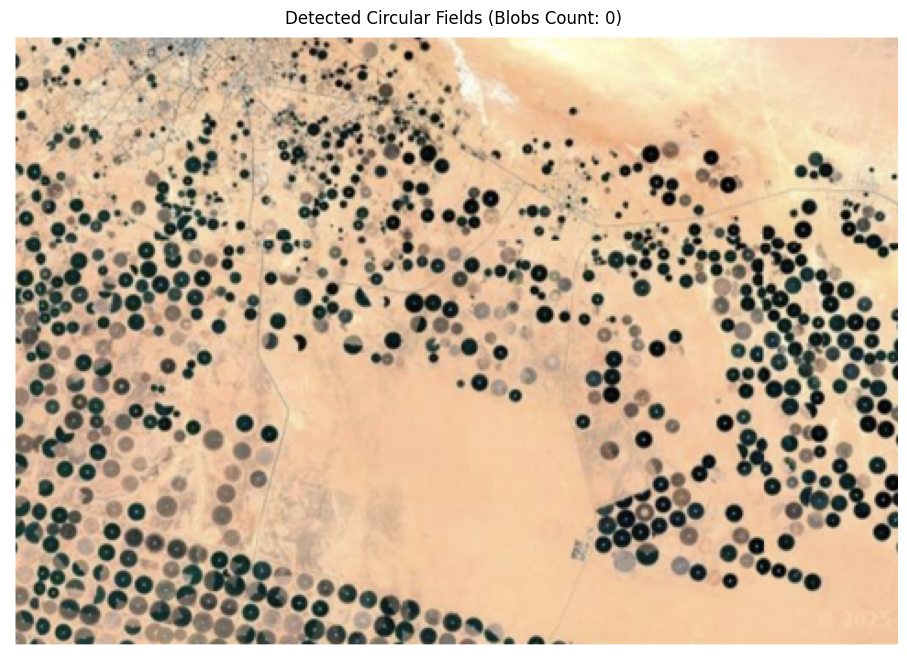

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the satellite image
image = cv2.imread('/content/Satellite images.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Set thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area
params.filterByArea = True
params.minArea = 1000  # adjust depending on blob size

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia = False

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(blurred)

# Draw keypoints
im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]),
                                      (0, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Circular Fields (Blobs Count: {len(keypoints)})")
plt.axis("off")
plt.show()
